<a href="https://colab.research.google.com/github/Saptiva-sudo/oasis_task2/blob/main/TASK2_OASIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDYING THE DATASET DURING THE PERIOD OF LOCKDOWN (25 Mar 2020 – 31 May 2020)**

**IMPORTING THE DATASET AND THE MODULES**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d gokulrajkmv/unemployment-in-india

import zipfile
zip_ref = zipfile.ZipFile('/content/unemployment-in-india.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/Unemployment in India.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india
License(s): other
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 29.6MB/s]


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**DATASET INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


**HANDLE THE MISSING VALUES AND DATASET PREPROCESSING**

In [ ]:
print("the null values are :")
print("\n")
print(df.isnull().sum())
print("\n")

df = df.dropna()
print("After removing the null values the new count is :")
print("\n")
print(df.isnull().sum())
print("\n")

print("the duplicated values count:")
print(df.duplicated().sum())
print("\n")

print("Renaming the columns after removing the starting space")
print("\n")
df.columns=df.columns.str.strip()
df.head()

the null values are :


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


After removing the null values the new count is :


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


the duplicated values count:
0


Renaming the columns after removing the starting space




,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**TRANSFORMING THE DATE COLUMN**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


**SUMMARY STATISTICS**

In [ ]:
# Summary statistics
print("Overall statistics of the dataset")
print("\n")
print(df.describe())
print("\n")

# Mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')


Overall statistics of the dataset


                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06 

**UNEMPLOYMENT RATE OVER TIME**

In [ ]:
import plotly.graph_objs as go

# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create Plotly figure
fig = go.Figure()

# Add scatter trace
fig.add_trace(go.Scatter(x=mean_unemployment_over_time.index,
                         y=mean_unemployment_over_time.values,
                         mode='lines+markers',
                         name='Unemployment Rate',
                         marker=dict(symbol='circle',
                                     size=12,
                                     color='blue'),
                         line=dict(color='coral', width=4)))

# Customize layout
fig.update_layout(title='Unemployment Rate Over Time',
                  xaxis_title='Date',
                  yaxis_title='Estimated Unemployment Rate (%)',
                  template='plotly',
                  width=1000,height=600)

# Show interactive plot
fig.show()


**Unemployment rate rose severly from March 2020 to May 2020 and decreased after June 2020.**

**BAR PLOT SHOWING MEAN OF ESTIMATED UNEMPLOYMENT RATE REGION BY REGION**

In [ ]:
import altair as alt
# Group data by region and calculate mean unemployment rate
mean_unemployment_by_region = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_unemployment_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Region', title='Region', sort='-y'),
    y=alt.Y('Estimated Unemployment Rate (%)', title='Estimated Unemployment Rate (%)'),
    color=alt.Color('Region', legend=None),
    tooltip=['Region', alt.Tooltip('Estimated Unemployment Rate (%)', title='Mean Unemployment Rate')]).properties(title='Average Unemployment Rate by Region',
    width=1600,
    height=500)

# Add annotations for mean values
annotations = bars.mark_text(align='center', baseline='bottom', dy=-5).encode(
    text=alt.Text('Estimated Unemployment Rate (%):Q', format='.2f'),size=alt.value(14)
)

# Combine the bars and annotations
chart = (bars + annotations)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)


alt.LayerChart(...)

**Unemployment Rates is higher in :
Tripura,
Haryana,
Jharkhand,
Bihar,
Himachal Pradesh.**

**BAR PLOT SHOWING MEAN OF ESTIMATED EMPLOYMENT RATE REGION BY REGION**

In [ ]:
# Group data by region and calculate mean employment rate
mean_employment_by_region = df.groupby('Region')['Estimated Employed'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_employment_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Region', title='Region', sort='-y'),
    y=alt.Y('Estimated Employed', title='Estimated Employment Rate'),
    color=alt.Color('Region', legend=None),
    tooltip=['Region', alt.Tooltip('Estimated Employed', title='Mean Employment Rate')]).properties(title='Average Employment Rate by Region',
    width=1000,
    height=500)

# Combine the bars and annotations
chart = (bars)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)

alt.Chart(...)

**Employed Population is high in:  Uttar Pradesh,Maharashtra,West Bengal,Bihar and Tamil Nadu.**

**BAR PLOT SHOWING MEAN OF ESTIMATED LABOUR PARTICIPATION RATE REGION BY REGION**

In [ ]:
# Group data by region and calculate mean labour rate
mean_labour_by_region = df.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_labour_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Region', title='Region', sort='-y'),
    y=alt.Y('Estimated Labour Participation Rate (%)', title='Estimated Labour Participation Rate'),
    color=alt.Color('Region', legend=None),
    tooltip=['Region', alt.Tooltip('Estimated Labour Participation Rate (%)', title='Mean Labour Participation Rate')]).properties(title='Average Labour Participation Rate by Region',
    width=1000,
    height=500)

# Combine the bars and annotations
chart = (bars)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)

alt.Chart(...)

**Labor Participation is high in: Tripura,Meghalaya,Telangana,Gujarat and Sikkim.**

**URBAN VS RURAL UNEMPLOYMENT RATE COMPARISON**

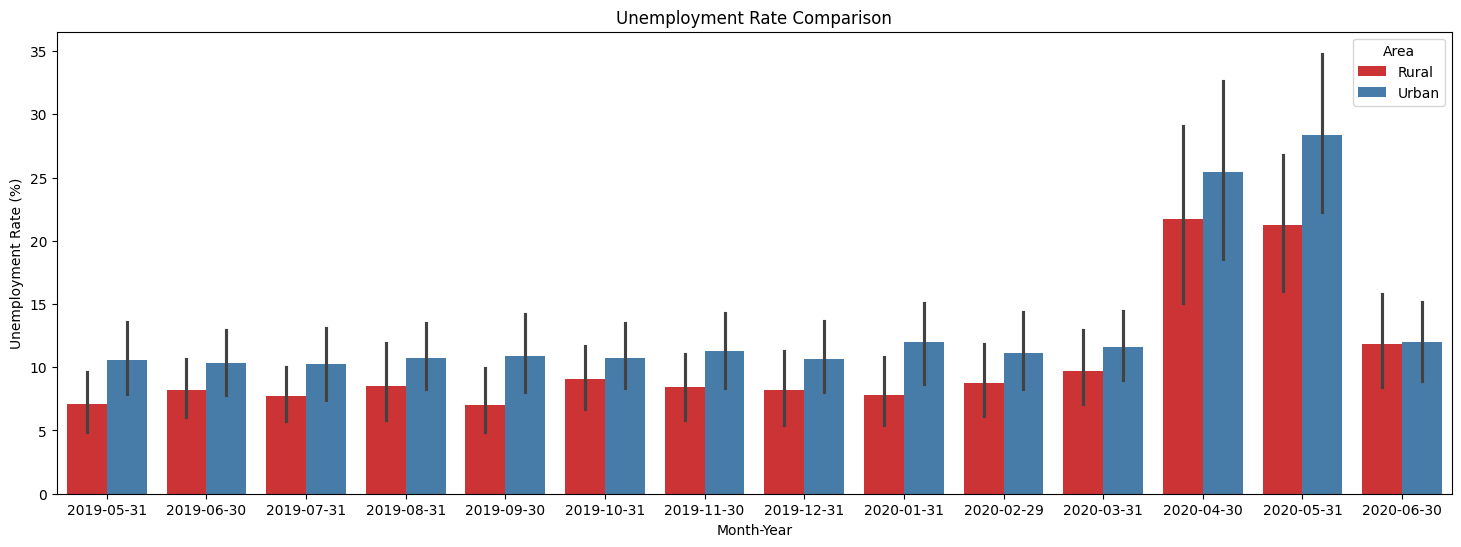

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 6))

# Create the bar plot
sns.barplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Area', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison")

# Show the plot
plt.show()


**Points to be considered are :**
*   Unemployment Rate is more in Rural areas than in Urban areas from May
    2019 to May 2020.
*   In, June 2020, the Unemployment rates in Urban and Rural Areas are almost the same.
*   The Unemployment Rate shoots up in the month of April and May in 2020. This is the time COVID started affecting the economy.







**URBAN VS RURAL EMPLOYMENT RATE COMPARISON**

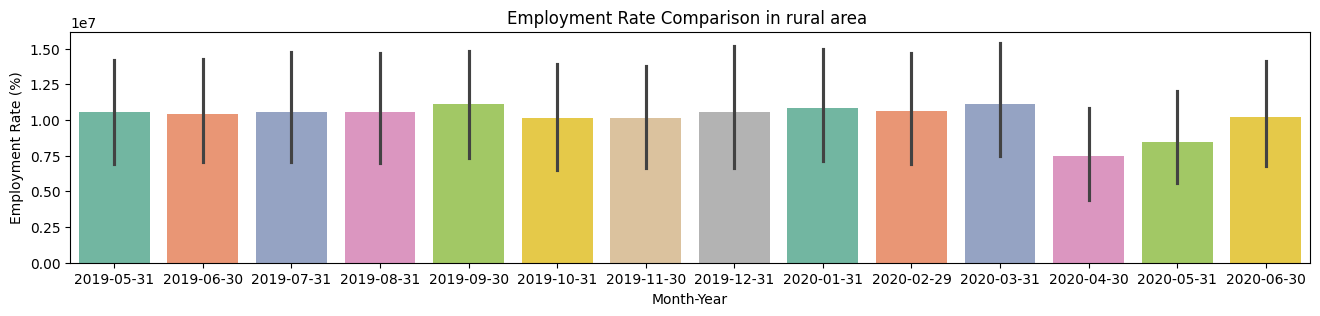

In [ ]:
plt.figure(figsize=(16, 3))
df_rural = df[df['Area'] == 'Rural']

# Create the bar plot
sns.barplot(x='Date', y='Estimated Employed', data=df_rural, palette='Set2')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Employment Rate (%)')
plt.title("Employment Rate Comparison in rural area ")

# Show the plot
plt.show()

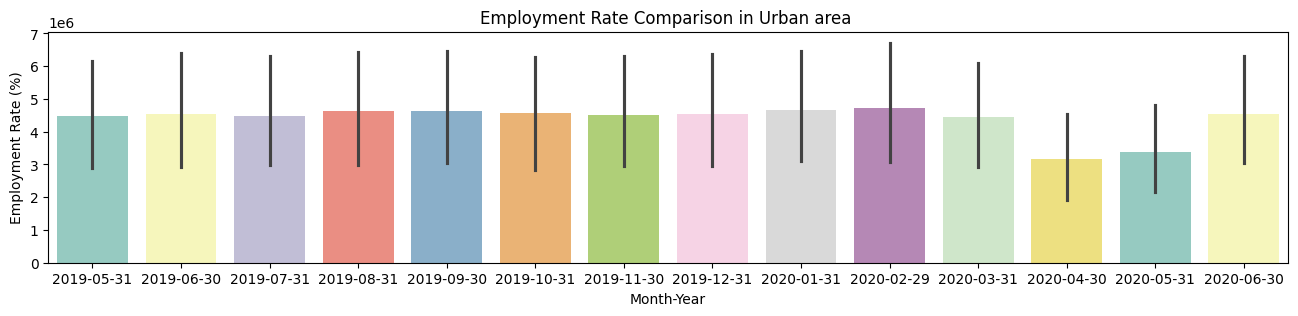

In [ ]:
plt.figure(figsize=(16, 3))
df_urban = df[df['Area'] == 'Urban']

# Create the bar plot
sns.barplot(x='Date', y='Estimated Employed', data=df_urban, palette='Set3')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Employment Rate (%)')
plt.title("Employment Rate Comparison in Urban area ")

# Show the plot
plt.show()

**Employed population is more in Urban areas than in Rural areas.
The Employed Poplution experiences a sudden decrease in the month of April and May in the year 2020.**

**URBAN VS RURAL LABOUR PARTICIPATION RATE COMPARISON**

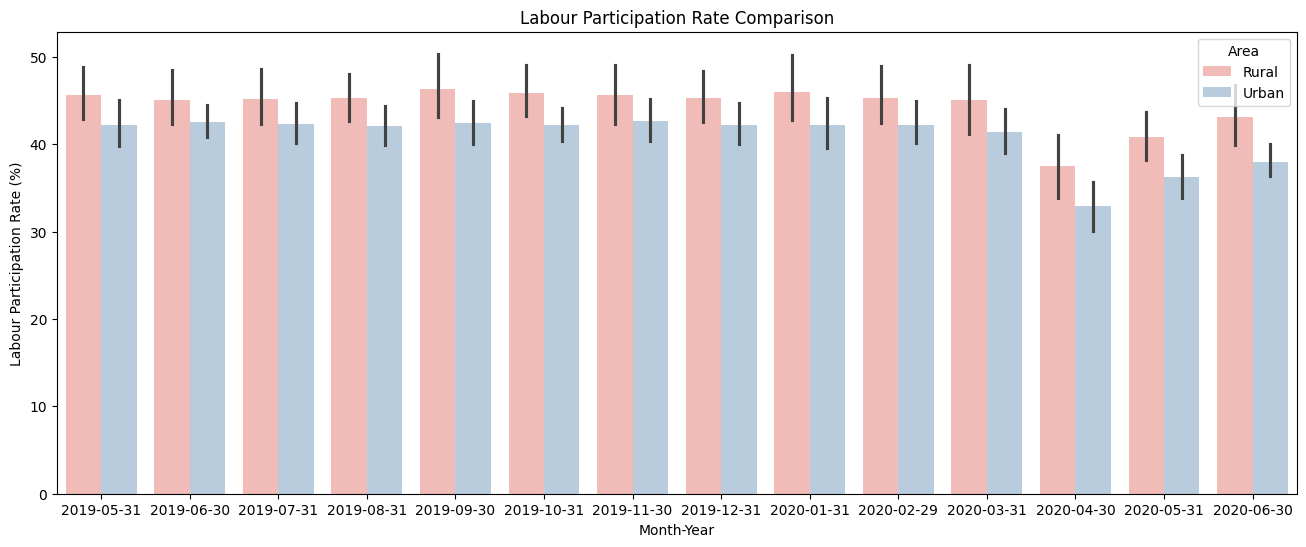

In [ ]:
plt.figure(figsize=(16, 6))

# Create the bar plot
sns.barplot(x='Date', y='Estimated Labour Participation Rate (%)', hue='Area', data=df, palette='Pastel1')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Labour Participation Rate Comparison")

# Show the plot
plt.show()

**Labour Participation Rate is more in Rural areas than in Urban areas.
The Labour Participation Rate suddenly decreased in the month of April in the year 2020.**

**DISTRIBUTION OF THE STATES INTO DIFFERENT ZONES**

In [ ]:
region_mapping = {
    "Chhattisgarh": "Central","Madhya Pradesh": "Central","Uttar Pradesh": "Central","Uttarakhand": "Central",
    "Bihar": "Eastern","Jharkhand": "Eastern","Odisha": "Eastern","West Bengal": "Eastern",
    "Arunachal Pradesh": "Northeast","Assam": "Northeast","Meghalaya": "Northeast","Mizoram": "Northeast","Nagaland": "Northeast","Manipur": "Northeast","Sikkim": "Northeast","Tripura": "Northeast",
    "Haryana": "Northern","Chandigarh": "Northern","Delhi": "Northern","Himachal Pradesh": "Northern","Jammu & Kashmir": "Northern","Punjab": "Northern","Rajasthan": "Northern",
    "Andhra Pradesh": "Southern","Karnataka": "Southern","Puducherry": "Southern","Kerala": "Southern","Tamil Nadu": "Southern","Telangana": "Southern",
    "Goa": "Western","Gujarat": "Western","Maharashtra": "Western"
}
def zone_map(state):
    return region_mapping.get(state, 'Unknown')

# Create a new column 'Zone' by mapping 'Region' column using the region_mapping dictionary
df['Zone'] = df['Region'].map(region_mapping).fillna('Unknown')
df.value_counts("Zone")

Zone
Northern     173
Southern     166
Eastern      112
Central      111
Northeast     98
Western       80
Name: count, dtype: int64

In [ ]:
zones = list(df['Zone'].unique())
zones

['Southern', 'Northeast', 'Eastern', 'Central', 'Northern', 'Western']

**UNEMPLOYMENT RATES ACROSS VARIOUS ZONES**

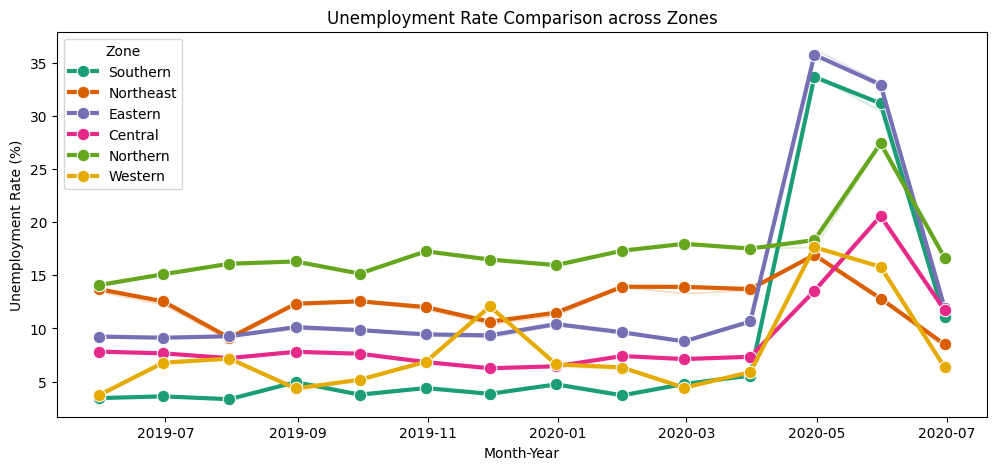

In [ ]:
plt.figure(figsize = (12,5))
sns.lineplot(x = 'Date', y = 'Estimated Unemployment Rate (%)', data = df,
            hue = 'Zone', errorbar=('ci', 0),palette = 'Dark2', marker='o', markersize=9, linewidth=3)

plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison across Zones");

*  The Southern and Eastern Regions have higher Unemployment Rates (sudden increase) in April-May 2020 as compared to other regions.
*   Northern and Central Regions have higher unemployment rates in May 2020 as compared to April 2020.
*   There is a sudden increase in unemployment rate in Western Regions in November 2019 and again increases in May 2020.
*   The Northern and North-Eastern Regions had the same unemployment rate in May 2019.Further, The western and southern regions had the same unemployment rate initially.
*   However in further months, the unemployment rate in Northern Regions increased compared to North-Eastern regions.








**EMPLOYMENT RATES ACROSS VARIOUS ZONES**

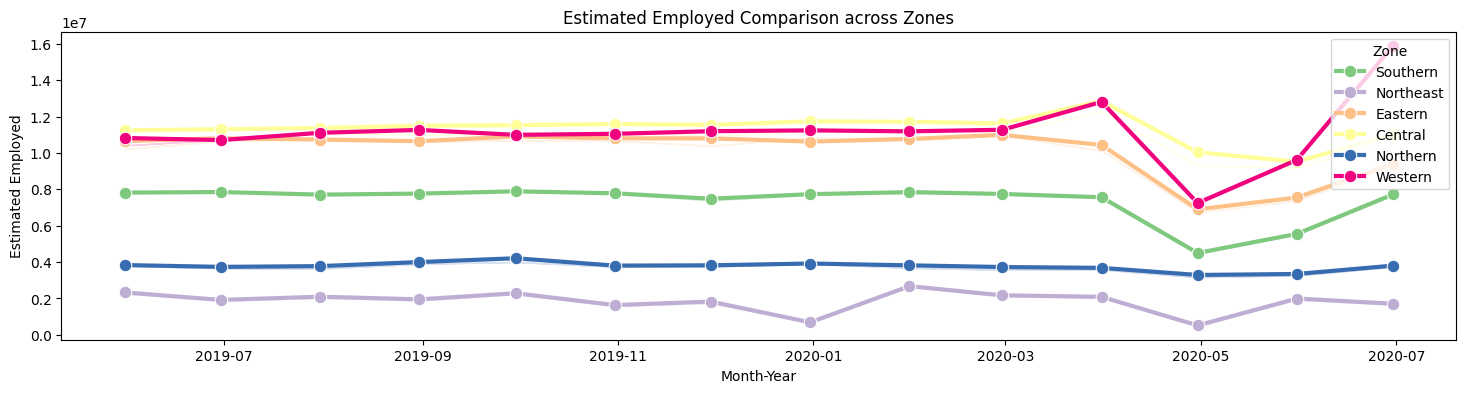

In [ ]:
plt.figure(figsize = (18,4))
sns.lineplot(x = 'Date', y = 'Estimated Employed', data = df,
            hue = 'Zone', errorbar=('ci', 0), palette = 'Accent',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Estimated Employed Comparison across Zones");

*   The Estimated Employed Population suddenly decreased in April 2020 in all regions.However,the decrease is mild (0.4 crores to around 0.38 crores) in the Northern region.
*   The Employed Population increased suddenly in June 2020 in the Western Region went from almost 1 crore to 1.6 crores.
*   The North-Eastern Region experienced a decrease in Employed population in December 2019 and April 2020.
*   The southern and the eastern regions almost follow same pattern of employment trend.





**LABOUR PARTICIPATION RATES ACROSS VARIOUS ZONES**

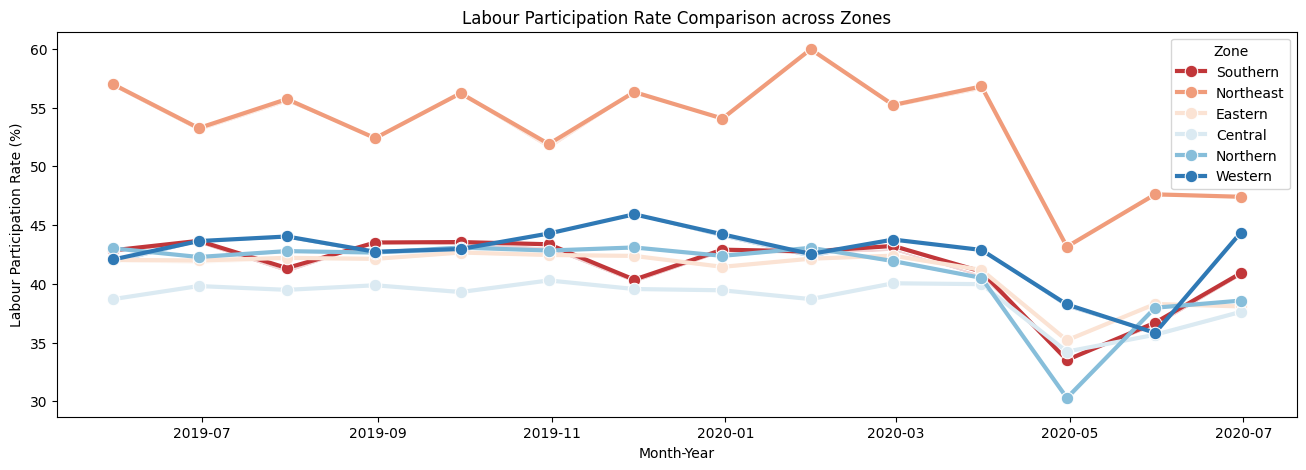

In [ ]:
plt.figure(figsize = (16,5))
sns.lineplot(x ='Date', y = 'Estimated Labour Participation Rate (%)', data = df,
            hue = 'Zone', errorbar=('ci', 0), palette = 'RdBu',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Labour Participation Rate Comparison across Zones");

*   The Labor Participation Rate in the North-Eastern is the highest at all times, compared to all other regions.
*   The decrease in Labor Participation Rate in most in Northeastern region in April 2020 (from 57% to 44%).
*   There is also a sharp dip in labour participation in Northern regions in May 2020.
*   In general , the labour participation decreases in all regions during April-May 2020.



**STUDYING THE AFTER EFFECTS OF THE LOCKDOWN**

**IMPORTING AND PREPROCESSING THE DATASET CONTAINING UNEMPLOYMENT RATES AFTER LOCKDOWN**

In [ ]:
df2 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
print(df2.head())
print("\n")
print(df2.info())
print("\n")
print(df2.isnull().sum())
print("\n")
df2['Date'] = pd.to_datetime(df2[' Date'])
df2['Day'] = df2['Date'].dt.day
df2['Month'] = df2['Date'].dt.month_name()
df2['Year'] = df2['Date'].dt.year
df2.head()

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Date,Day,Month,Year
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,2020-01-31,31,January,2020
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,2020-02-29,29,February,2020
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,2020-03-31,31,March,2020
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,2020-04-30,30,April,2020
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,2020-05-31,31,May,2020


In [ ]:
# Convert month names to month numbers
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df2['Month'] = df2['Month'].map(month_to_num)

In [ ]:
after_lockdown_df = df2[df2.Month >= 5]

In [ ]:
after_lockdown_df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'Date', 'Day', 'Month', 'Year'],
      dtype='object')

**ESTIMATED UNEMPLOYMENT RATE AFTER THE LOCKDOWN**

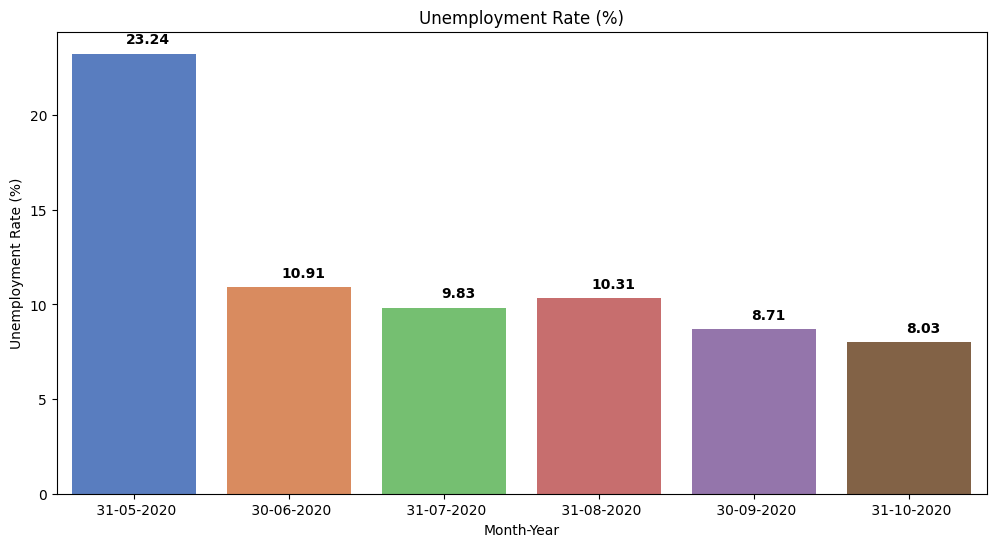

In [ ]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=after_lockdown_df,
                 errorbar=('ci', 0),palette="muted")
# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(10, 10), textcoords='offset points',fontweight='bold')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate (%)")

# Show the plot
plt.show()


*   Unemployment rate has reduced after lockdown.It was severly high during lockdown.
*   Unemployment Rate is around 8 - 11% after the lockdown. During Lockdown, it was around 24%.



**ESTIMATED EMPLOYMENT RATE AFTER THE LOCKDOWN**

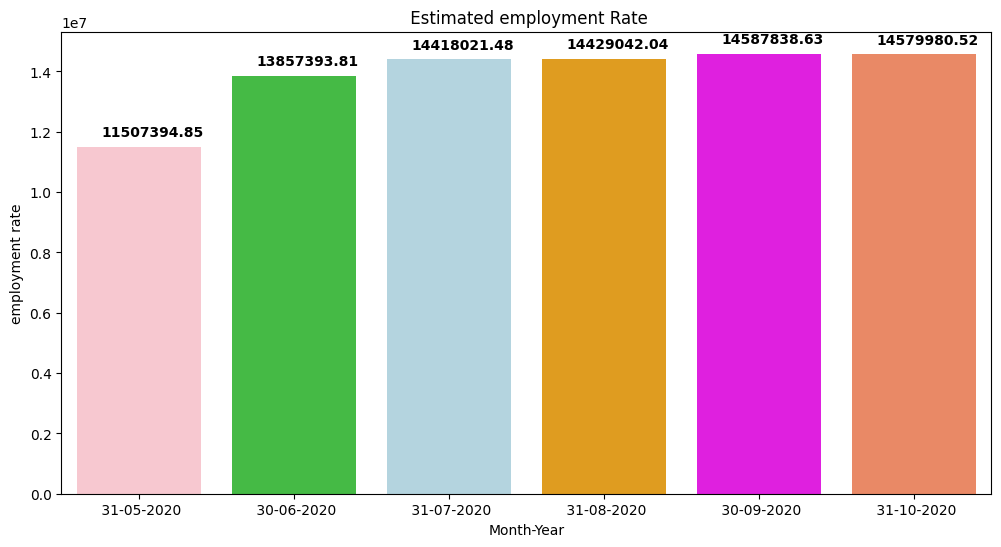

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))
custom_palette = ['pink', 'limegreen', 'lightblue', 'orange', 'magenta','coral']
# Create the bar plot
ax = sns.barplot(x=' Date', y=' Estimated Employed', data=after_lockdown_df,
                 errorbar=('ci', 0),palette=custom_palette)
# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(10, 10), textcoords='offset points',fontweight='bold')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('employment rate')
plt.title(" Estimated employment Rate")

# Show the plot
plt.show()

*   Employment rate is very low in lockdown and high after lockdown.
*   The Employed Population is around 1.38 crores - 1.52 crores after lockdown. During Lockdown, it was 1.18 crores.



**ESTIMATED LABOUR PARTICIPATION RATE AFTER THE LOCKDOWN**

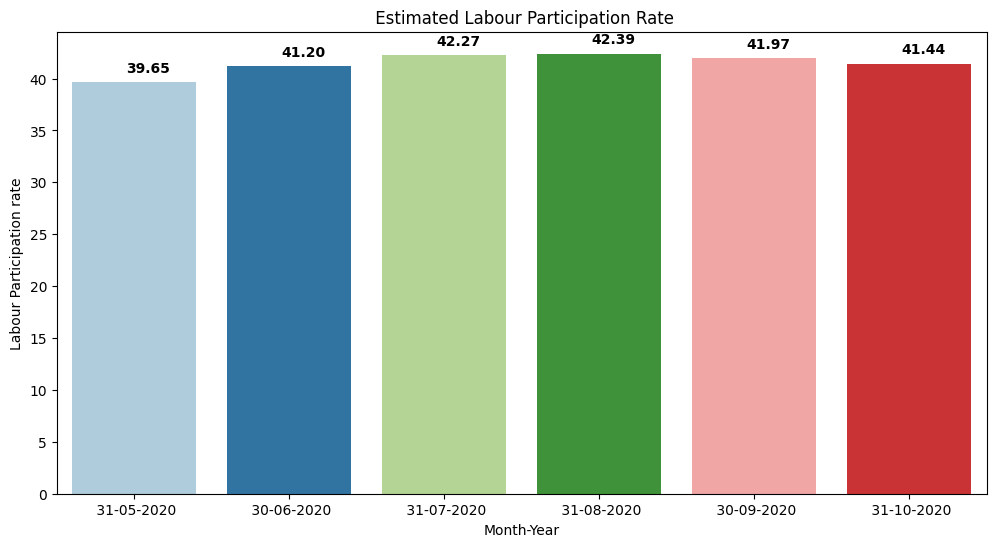

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Create the bar plot
ax = sns.barplot(x=' Date',  y=' Estimated Labour Participation Rate (%)', data=after_lockdown_df,
                 errorbar=('ci', 0),palette="Paired")
# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(10, 10), textcoords='offset points',fontweight='bold')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation rate')
plt.title(" Estimated Labour Participation Rate")

# Show the plot
plt.show()

*   Labour Participation is less during lockdown than after lockdown.
*   However , there seems to be no much difference in the Labor Participation after lockdown.



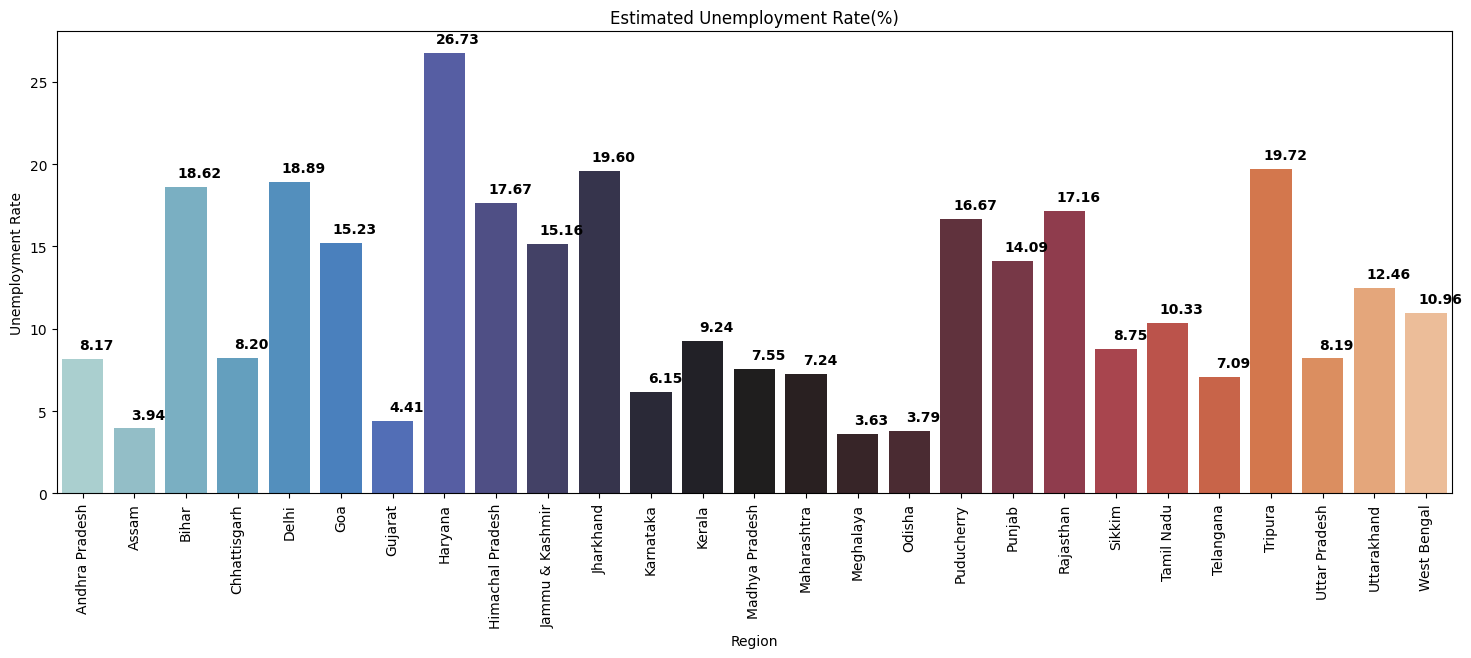

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 6))

# Create the bar plot
ax = sns.barplot(x='Region',  y=' Estimated Unemployment Rate (%)', data=after_lockdown_df,
                 errorbar=('ci', 0), palette="icefire")

# Rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate labels by 90 degrees

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(10, 10), textcoords='offset points', fontweight='bold')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.title("Estimated Unemployment Rate(%)")

# Show the plot
plt.show()


**Lockdown has affected employment in:
Haryana,
Tripura,
Jharkhand,
Delhi,
Bihar,
Himachal Pradesh,
Rajasthan and  
Jammu and Kashmir.**
